<a href="https://colab.research.google.com/github/AlexBB999/THINK/blob/master/WIND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ks_2samp
import random

READ THE USGS WIND TURBINE DATASET THAT IDENTIFIES EVERY WIND TURBINE IN THE USA + PUERTO RICO + GUAM


In [0]:
wind=pd.read_csv('https://raw.githubusercontent.com/AlexBB999/Thinkful/master/wind_data.csv')

In [0]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60576 entries, 0 to 60575
Data columns (total 24 columns):
case_id       60576 non-null int64
faa_ors       53368 non-null object
faa_asn       53697 non-null object
usgs_pr_id    41397 non-null float64
t_state       60576 non-null object
t_county      60576 non-null object
t_fips        60576 non-null int64
p_name        60576 non-null object
p_year        60330 non-null float64
p_tnum        60576 non-null int64
p_cap         56530 non-null float64
t_manu        56366 non-null object
t_model       56227 non-null object
t_cap         56531 non-null float64
t_hh          54477 non-null float64
t_rd          55408 non-null float64
t_rsa         55408 non-null float64
t_ttlh        54477 non-null float64
t_conf_atr    60576 non-null int64
t_conf_loc    60576 non-null int64
t_img_date    38467 non-null object
t_img_srce    60576 non-null object
xlong         60576 non-null float64
ylat          60576 non-null float64
dtypes: float64(10), i

WE HAVE 60,576 ENTRIES AND 24 ATTRIBUTES


In [0]:
c=list(wind)
l=range(24)

In [0]:
new=zip(l,c)
list(new)

[(0, 'case_id'),
 (1, 'faa_ors'),
 (2, 'faa_asn'),
 (3, 'usgs_pr_id'),
 (4, 't_state'),
 (5, 't_county'),
 (6, 't_fips'),
 (7, 'p_name'),
 (8, 'p_year'),
 (9, 'p_tnum'),
 (10, 'p_cap'),
 (11, 't_manu'),
 (12, 't_model'),
 (13, 't_cap'),
 (14, 't_hh'),
 (15, 't_rd'),
 (16, 't_rsa'),
 (17, 't_ttlh'),
 (18, 't_conf_atr'),
 (19, 't_conf_loc'),
 (20, 't_img_date'),
 (21, 't_img_srce'),
 (22, 'xlong'),
 (23, 'ylat')]

DROP 9 COLUMNS NOT RELEVANT TO THIS PROJECT

ADD "MEAN CAPACITY FACTOR COLUMN"

In [0]:
wind.drop(wind.columns[[1,2,3,16,17,18,19,20,21]],axis=1,inplace=True)
wind['Mean Capacity Factor']=0.0

In [0]:
wind.shape

(60576, 16)

RENAMES COLUMNS SO HUMANS CAN READ THEM

In [0]:
wind.columns=['CaseID','State','County','LocationID','Project Name', 'Year Built','Number of Turbines',"Max Project Capacity",'Turbine Manufacturer','Turbine Model','Max Turbine Capacity','Tower Hub Height','Rotor Diameter','Longitude','Latitude','Mean Capacity Factor']

In [0]:
wind.head()

,CaseID,State,County,LocationID,Project Name,Year Built,Number of Turbines,Max Project Capacity,Turbine Manufacturer,Turbine Model,Max Turbine Capacity,Tower Hub Height,Rotor Diameter,Longitude,Latitude,Mean Capacity Factor
0,3073403,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.352219,35.088993,0.0
1,3001002,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.357185,35.086594,0.0
2,3005085,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.353485,35.085896,0.0
3,3073404,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.352531,35.087852,0.0
4,3073401,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.354652,35.085163,0.0


In [0]:
wind.shape

(60576, 16)

GET COUNT OF EACH MANUFACTURER LISTED IN DATABASE

In [0]:
wind['Turbine Manufacturer'].value_counts()


GE Wind              23495
Vestas               12870
Siemens               5251
Mitsubishi            2910
Gamesa                2717
                     ...  
Enron Corporation        1
Wind World               1
Skystream                1
Leitner Poma             1
Bergey Energy            1
Name: Turbine Manufacturer, Length: 71, dtype: int64

HISTOGRAM OF MAX POWER FOR ALL TURBINES

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.8250e+03, 4.7660e+03, 2.3791e+04, 1.8451e+04, 4.2540e+03,
        1.4390e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([  50.,  645., 1240., 1835., 2430., 3025., 3620., 4215., 4810.,
        5405., 6000.]),
 <a list of 10 Patch objects>)

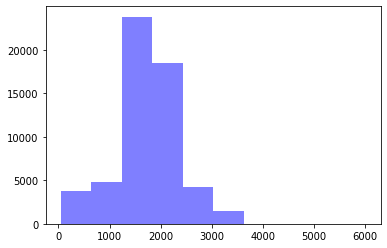

In [0]:
plt.hist(wind['Max Turbine Capacity'], alpha = .5,color='b')

CREATING PANDAS SUBSET  --  ONLY TURBINES IN CALIFORNIA

In [0]:
wind_cali=wind[wind['State']=='CA']

In [0]:
wind_cali.shape

(8119, 16)

DROP ROWS WHERE  --> t_CAP=NaN -- NO ENTRY FOR MAX CAPACITY

In [0]:
wind_cali = wind_cali.dropna(subset=['Max Turbine Capacity'])

In [0]:
wind_cali.shape

(6075, 16)

In [0]:
wind_cali.head(2)

,CaseID,State,County,LocationID,Project Name,Year Built,Number of Turbines,Max Project Capacity,Turbine Manufacturer,Turbine Model,Max Turbine Capacity,Tower Hub Height,Rotor Diameter,Longitude,Latitude,Mean Capacity Factor
0,3073403,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.352219,35.088993,0.0
1,3001002,CA,Kern County,6029,251 Wind,1987.0,194,18.43,Vestas - American Wind Technology Inc.,Unknown Vestas,95.0,NaN,NaN,-118.357185,35.086594,0.0


FIND MINIMUM LATITUDE FOR CALIFORNIA WIND TURBINES

In [0]:
wind_cali['Latitude'].min()

32.701496

FIND MAXIMUM LATITUDE FOR CALIFORNIA WIND TURBINES

In [0]:
wind_cali['Latitude'].max()

40.914696

SELECT  TURBINES BETWEEN LATITUDE 32 AND 34  NORTH --  SOUTHERN CALIFORNIA

In [0]:
cali_south=wind_cali[(wind_cali['Latitude']>32) & (wind_cali['Latitude']<34)]

RANDOMLY SELECT 30 TURBINES FROM ABOVE SOUTHERN CALI SUBSET

In [0]:
cs=cali_south.sample(30,random_state=1)

In [0]:
cs['Max Turbine Capacity'].sum()

14648.0

In [0]:
cs.shape

(30, 17)

In [0]:
cs

,CaseID,State,County,LocationID,Project Name,Year Built,Number of Turbines,Max Project Capacity,Turbine Manufacturer,Turbine Model,Max Turbine Capacity,Tower Hub Height,Rotor Diameter,Longitude,Latitude,Mean Capacity Factor
24740,3006356,CA,Riverside County,6065,Karen Avenue Windfarm,2004.0,12,11.700,GE Wind,1.5-70.5,1500.0,56.5,77.0,-116.555290,33.921993,16.10
36806,3067710,CA,Riverside County,6065,Painted Hills,1985.0,169,15.210,Vestas - American Wind Technology Inc.,V17,90.0,NaN,17.0,-116.631630,33.935703,21.50
36885,3067760,CA,Riverside County,6065,Painted Hills,1985.0,59,3.835,Vestas - American Wind Technology Inc.,V15,65.0,NaN,15.0,-116.618141,33.937469,12.70
31899,3002834,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.661087,33.960297,12.70
31928,3003352,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.658691,33.954594,12.70
771,3000119,CA,Riverside County,6065,Alta Mesa 1 and 2,1988.0,115,18.560,Danwin,23_160,160.0,23.0,23.0,-116.660759,33.942959,10.20
31697,3004362,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.658806,33.955647,16.10
826,3008467,CA,Riverside County,6065,Alta Mesa 1 and 2,1988.0,115,18.560,Danwin,23_160,160.0,23.0,23.0,-116.666092,33.945309,9.23
31884,3009485,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.652290,33.953796,12.70
44514,3008744,CA,Riverside County,6065,San Gorgonio Westwinds II LLC,1999.0,48,33.600,NEG Micon,NM48,700.0,50.0,48.0,-116.588890,33.895195,14.40


In [0]:
cn['Max Turbine Capacity'].sum()

41585.0

In [0]:
cs[['t_manu','t_model','t_cap','t_hh','ylat','xlong','mean capacity factor']]

,t_manu,t_model,t_cap,t_hh,ylat,xlong,mean capacity factor
24740,GE Wind,1.5-70.5,1500.0,56.5,33.921993,-116.555290,16.10
36806,Vestas - American Wind Technology Inc.,V17,90.0,NaN,33.935703,-116.631630,21.50
36885,Vestas - American Wind Technology Inc.,V15,65.0,NaN,33.937469,-116.618141,12.70
31899,Vestas,V15,65.0,22.8,33.960297,-116.661087,12.70
31928,Vestas,V15,65.0,22.8,33.954594,-116.658691,12.70
771,Danwin,23_160,160.0,23.0,33.942959,-116.660759,10.20
31697,Vestas,V15,65.0,22.8,33.955647,-116.658806,16.10
826,Danwin,23_160,160.0,23.0,33.945309,-116.666092,9.23
31884,Vestas,V15,65.0,22.8,33.953796,-116.652290,12.70
44514,NEG Micon,NM48,700.0,50.0,33.895195,-116.588890,14.40


In [0]:
cs.at[24740,'Mean Capacity Factor']=16.1
cs.at[36806,'Mean Capacity Factor']=21.5
cs.at[36885,'Mean Capacity Factor']=12.7
cs.at[31899,'Mean Capacity Factor']=12.7
cs.at[31928,'Mean Capacity Factor']=12.7
cs.at[771,'Mean Capacity Factor']=10.2
cs.at[31697,'Mean Capacity Factor']=16.1
cs.at[826,'Mean Capacity Factor']=9.23
cs.at[31884,'Mean Capacity Factor']=12.7
cs.at[44514,'Mean Capacity Factor']=14.4
cs.at[44431,'Mean Capacity Factor']=13.1
cs.at[13638,'Mean Capacity Factor']=17.2
cs.at[33343,'Mean Capacity Factor']=13.2
cs.at[44519,'Mean Capacity Factor']=18.3
cs.at[44428,'Mean Capacity Factor']=14.2
cs.at[55048,'Mean Capacity Factor']=119.5
cs.at[36845,'Mean Capacity Factor']=18.4
cs.at[33408,'Mean Capacity Factor']=14.8
cs.at[35882,'Mean Capacity Factor']=25.6
cs.at[36809,'Mean Capacity Factor']=13.5
cs.at[33402,'Mean Capacity Factor']=13.6
cs.at[44530,'Mean Capacity Factor']=15.9
cs.at[33425,'Mean Capacity Factor']=15.5
cs.at[33301,'Mean Capacity Factor']=17.3
cs.at[33399,'Mean Capacity Factor']=16.1
cs.at[44534,'Mean Capacity Factor']=15.9
cs.at[33310,'Mean Capacity Factor']=13.6
cs.at[31894,'Mean Capacity Factor']=13.8
cs.at[52153,'Mean Capacity Factor']=25.9
cs.at[44441,'Mean Capacity Factor']=14.2

In [0]:
cs['Mean Capacity Factor'].mean()

18.930999999999997

In [0]:
stats.describe(cs['mean capacity factor'])

DescribeResult(nobs=30, minmax=(9.23, 119.5), mean=18.930999999999997, variance=374.54483, skewness=4.904944172237025, kurtosis=23.02034622752321)

HITOGRAM OF MEAN CAPACITY FACTOR FOR EACH TURBINE -- CLEARLY NOT NORMAL

(array([26.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  9.23 ,  20.257,  31.284,  42.311,  53.338,  64.365,  75.392,
         86.419,  97.446, 108.473, 119.5  ]),
 <a list of 10 Patch objects>)

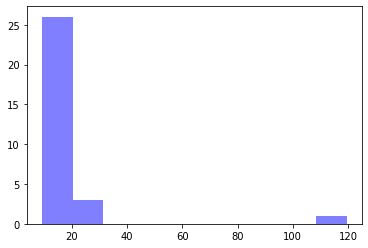

In [0]:
plt.hist(cs['mean capacity factor'], alpha = .5,color='b')

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

NORTHEN CALIFORNIA

SELECTING TURBINES BETWEEN LATITUDE 37 AND 40.92     --   NORTHERN CALIFORNIA

In [0]:
cali_north=wind_cali[(wind_cali['Latitude']>37) & (wind_cali['Latitude']<40.92)]

In [0]:
cali_north.shape

(1191, 16)

RANDOMLY SELECT 30 TURBINES FROM NORTHERN CALI SUBSET

In [0]:
cn=cali_north.sample(30,random_state=1)

In [0]:
cn.shape

(30, 16)

///////////////////////////////////////////////////////////////////////////////////////////////

In [0]:
##wind_cali = wind_cali.dropna(subset=['t_cap'])
cn2 = cn.dropna(subset=['p_name'])

In [0]:
cn2.shape

(30, 17)

CORRELATION

In [0]:
cn_sub=cn[['Max Turbine Capacity','Tower Hub Height','Mean Capacity Factor']]
cn_sub.corr()

,Max Turbine Capacity,Tower Hub Height,Mean Capacity Factor
Max Turbine Capacity,1.000000,0.827288,0.437994
Tower Hub Height,0.827288,1.000000,0.546270
Mean Capacity Factor,0.437994,0.546270,1.000000


In [0]:
cs_sub=cs[['Max Turbine Capacity','Tower Hub Height','Mean Capacity Factor']]
cs_sub.corr()

,Max Turbine Capacity,Tower Hub Height,Mean Capacity Factor
Max Turbine Capacity,1.000000,0.896134,0.412141
Tower Hub Height,0.896134,1.000000,0.359305
Mean Capacity Factor,0.412141,0.359305,1.000000


In [0]:
#cn=cn2

In [0]:
cn

,CaseID,State,County,LocationID,Project Name,Year Built,Number of Turbines,Max Project Capacity,Turbine Manufacturer,Turbine Model,Max Turbine Capacity,Tower Hub Height,Rotor Diameter,Longitude,Latitude,Mean Capacity Factor
13366,3020543,CA,Alameda County,6001,Diablo Winds,2004.0,31,20.460,Vestas,V47-0.66,660.0,60.0,47.0,-121.625084,37.745895,30.10
45928,3028682,CA,Solano County,6095,Shiloh II,2009.0,33,66.000,REpower,MM92,2000.0,68.5,92.5,-121.840691,38.173996,39.90
23633,3004156,CA,Merced County,6047,International Turbine Research Center,1988.0,161,17.430,NaN,NaN,105.0,NaN,NaN,-121.194290,37.046196,23.20
46170,3016948,CA,Solano County,6095,Shiloh Wind Project,2006.0,76,114.000,GE Wind,GE1.5-77,1500.0,80.0,77.0,-121.827583,38.162395,36.30
45958,3028700,CA,Solano County,6095,Shiloh II,2009.0,42,84.000,REpower,MM92,2000.0,80.0,92.5,-121.769989,38.163994,40.50
33053,3036696,CA,Solano County,6095,Montezuma,2010.0,16,36.800,Siemens,SWT-2.3-93,2300.0,80.0,93.0,-121.792885,38.152195,17.80
21699,3071498,CA,Solano County,6095,High Winds,2003.0,90,162.000,Vestas,V80-1.8,1800.0,60.0,80.0,-121.801735,38.100502,12.60
47069,3025436,CA,Solano County,6095,Solano Wind Project,2007.0,21,63.000,Vestas,V90-3.0,3000.0,80.0,90.0,-121.760490,38.108395,39.30
33079,3040370,CA,Solano County,6095,Montezuma Winds II,2012.0,34,78.200,Siemens,SWT-2.3-93,2300.0,80.0,93.0,-121.809586,38.116894,36.40
21650,3011420,CA,Solano County,6095,High Winds,2003.0,90,162.000,Vestas,V80-1.8,1800.0,60.0,80.0,-121.789688,38.142094,17.50


In [0]:
cn['Max Turbine Capacity'].sum()

41585.0

In [0]:
stats.describe(cn['Mean Capacity Factor'])

DescribeResult(nobs=30, minmax=(0.0, 0.0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)

USING XANT M-21 (100kW)  for NTK65 (65kW)  --- and for  KENETECH KCS56-100 (100kW)

BECAUSE THOSE MANFACTURERS OR MODELS NOT IN RENEWABLES.NINJA DATABASE

ALSO USING XANT FOR MISSING INFO WITH (105kW) TURBINES




In [0]:
cn.at[13366,'Mean Capacity Factor']=30.1
cn.at[45928,'Mean Capacity Factor']=39.9
cn.at[23633,'Mean Capacity Factor']=23.2
cn.at[46170,'Mean Capacity Factor']=36.3
cn.at[45958,'Mean Capacity Factor']=40.5
cn.at[33053,'Mean Capacity Factor']=17.8
cn.at[21699,'Mean Capacity Factor']=12.6
cn.at[47069,'Mean Capacity Factor']=39.3
cn.at[33079,'Mean Capacity Factor']=36.4
cn.at[21650,'Mean Capacity Factor']=17.5
cn.at[14250,'Mean Capacity Factor']=34.2
cn.at[21724,'Mean Capacity Factor']=34.4
cn.at[46062,'Mean Capacity Factor']=40.1
cn.at[45984,'Mean Capacity Factor']=40.5
cn.at[46194,'Mean Capacity Factor']=34.5
cn.at[46124,'Mean Capacity Factor']=34.5
cn.at[18066,'Mean Capacity Factor']=47.8
cn.at[38010,'Mean Capacity Factor']=30.0
cn.at[47087,'Mean Capacity Factor']=14.9
cn.at[47072,'Mean Capacity Factor']=30.4
cn.at[23632,'Mean Capacity Factor']=24.4
cn.at[23625,'Mean Capacity Factor']=24.5
cn.at[23645,'Mean Capacity Factor']=24.5
cn.at[46157,'Mean Capacity Factor']=33.2
cn.at[45966,'Mean Capacity Factor']=40.7
cn.at[18024,'Mean Capacity Factor']=47.9
cn.at[38091,'Mean Capacity Factor']=30.0
cn.at[21686,'Mean Capacity Factor']=35.3
cn.at[18077,'Mean Capacity Factor']=36.1
cn.at[38136,'Mean Capacity Factor']=6.56

In [0]:
stats.describe(cn['Mean Capacity Factor'])

DescribeResult(nobs=30, minmax=(6.56, 47.9), mean=31.268666666666665, variance=102.33510850574713, skewness=-0.62862314835081, kurtosis=-0.1473689141080743)

(array([1., 1., 3., 0., 4., 4., 6., 4., 5., 2.]),
 array([ 6.56 , 10.694, 14.828, 18.962, 23.096, 27.23 , 31.364, 35.498,
        39.632, 43.766, 47.9  ]),
 <a list of 10 Patch objects>)

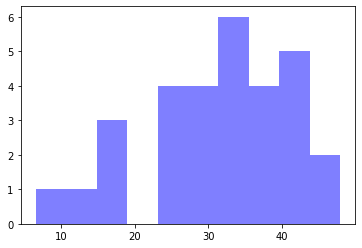

In [0]:
plt.hist(cn['Mean Capacity Factor'], alpha = .5,color='b')

In [0]:
 stats.shapiro(cn['Mean Capacity Factor'])

(0.9473797082901001, 0.14377719163894653)

In [0]:
stats.shapiro(cs['Mean Capacity Factor'])

(0.3288383483886719, 1.2441145336161696e-10)

In [0]:
ks_2samp(cn['Mean Capacity Factor'],cs['Mean Capacity Factor'])

Ks_2sampResult(statistic=0.7333333333333333, pvalue=4.326943555111202e-08)

In [0]:
#pd.concat([s1, s2], axis=1)

In [0]:
x[0]

45960

In [0]:
x[1]

'mean capacity factor'

In [0]:
#wind_cali_county.first()

/////////////////////////////////////////////////////////////////////

In [0]:
wind_cali_county_cap=wind.groupby(['t_county','t_cap'])

In [0]:
#wind_north=wind_cali[wind_cali['t_county'].isin(['Monterey County','Yolo County'])]

In [0]:
wind_north=wind_cali[wind_cali['t_county']=='Yolo County']

In [0]:
cn.to_pickle('cn.pickle')



NameError: ignored

In [0]:
cn2 = pd.read_pickle('cn.pickle')

cn2

FileNotFoundError: ignored

In [0]:
Mean Capacity Factor